Aproximação encontrada: (-0.4142135623842478, 0.5857864376157522)


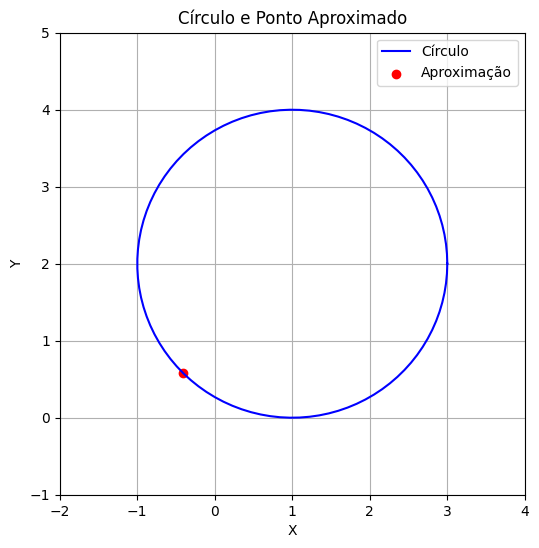

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

def bisection_method_2d(func, points, tolerance=1e-10, max_iterations=500000):
    x_center, y_center, radius = points[0]

    # Definindo os intervalos para x e y em torno do centro do círculo com base no raio
    x_start, x_end = x_center - radius, x_center + radius
    y_start, y_end = y_center - radius, y_center + radius

    iteration = 0

    while iteration < max_iterations:
        x_mid = (x_start + x_end) / 2
        y_mid = (y_start + y_end) / 2

        # Calcula os valores da função para as coordenadas x e y intermediárias
        value_x = func(points[0])(x_mid, y_center)
        value_y = func(points[0])(x_center, y_mid)

        # Verifica se os valores da função estão dentro da tolerância
        if abs(value_x) < tolerance and abs(value_y) < tolerance:
            return x_mid, y_mid

        # Atualiza os intervalos para x e y com base nos valores calculados
        if value_x * func(points[0])(x_start, y_center) < 0:
            x_end = x_mid
        else:
            x_start = x_mid

        if value_y * func(points[0])(x_center, y_start) < 0:
            y_end = y_mid
        else:
            y_start = y_mid

        iteration += 1

    print("Número máximo de iterações excedido")
    return None  # Retorna None se exceder o número máximo de iterações

def circle_equations(point):
    center_x, center_y, radius = point
    radius = sqrt(2)/2 * radius
    # Equação do círculo: (x - center_x)² + (y - center_y)² = radius²
    result = lambda x, y: (x - center_x)**2 + (y - center_y)**2 - radius**2
    return result

# Exemplo de uso:
points = [(1, 2, 2)]  # Pontos dados (x, y, raio)

# Encontrando a aproximação usando o método da bissecção com as equações dos círculos
approximation = bisection_method_2d(circle_equations, points)
print("Aproximação encontrada:", approximation)

# Coordenadas do centro do círculo e raio
x_center, y_center, radius = points[0]

# Criando um intervalo de ângulos para desenhar o círculo
theta = np.linspace(0, 2*np.pi, 100)

# Calculando as coordenadas do círculo
x_circle = x_center + radius * np.cos(theta)
y_circle = y_center + radius * np.sin(theta)

# Plotando o círculo e o ponto aproximado
plt.figure(figsize=(6,6))
plt.plot(x_circle, y_circle, label='Círculo', color='blue')
plt.scatter(*approximation, color='red', label='Aproximação')

# Definindo os limites do gráfico
plt.xlim(x_center - radius - 1, x_center + radius + 1)
plt.ylim(y_center - radius - 1, y_center + radius + 1)

# Adicionando rótulos e legendas
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Círculo e Ponto Aproximado')
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

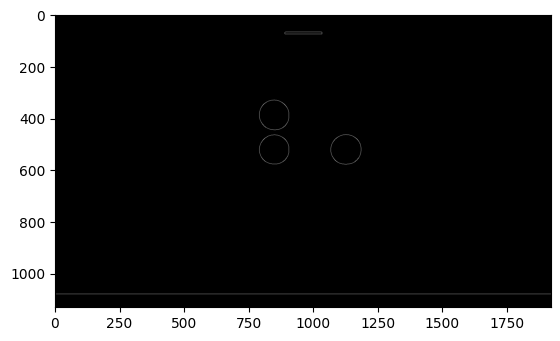

[[ 846  520   56]
 [ 847  385   57]
 [1122  517   60]]
[(-114.0, 20.0, 56), (-113.0, 155.0, 57), (162.0, 23.0, 60)]
Pontos encontrados: [(-142.0, -8.0), (-141.5, 126.5), (132.0, -7.0)]


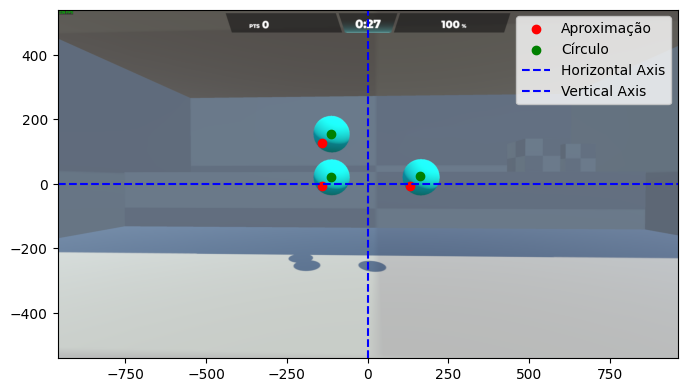

In [59]:
import cv2 as cv
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

def bisection_method_2d(func, points, tolerance=1e-10, max_iterations=500000):
    x_center, y_center, radius = points[0]

    # Definindo os intervalos para x e y em torno do centro do círculo com base no raio
    x_start, x_end = x_center - radius, x_center + radius
    y_start, y_end = y_center - radius, y_center + radius

    iteration = 0

    while iteration < max_iterations:
        x_mid = (x_start + x_end) / 2
        y_mid = (y_start + y_end) / 2

        # Calcula os valores da função para as coordenadas x e y intermediárias
        value_x = func(points[0])(x_mid, y_center)
        value_y = func(points[0])(x_center, y_mid)

        # Verifica se os valores da função estão dentro da tolerância
        if abs(value_x) < tolerance and abs(value_y) < tolerance:
            return x_mid, y_mid

        # Atualiza os intervalos para x e y com base nos valores calculados
        if value_x * func(points[0])(x_start, y_center) < 0:
            x_end = x_mid
        else:
            x_start = x_mid

        if value_y * func(points[0])(x_center, y_start) < 0:
            y_end = y_mid
        else:
            y_start = y_mid

        iteration += 1

    print("Número máximo de iterações excedido")
    return None  # Retorna None se exceder o número máximo de iterações

def circle_equations(point):
    center_x, center_y, radius = point
    radius = 1/2 * radius
    # Equação do círculo: (x - center_x)² + (y - center_y)² = radius²
    result = lambda x, y: (x - center_x)**2 + (y - center_y)**2 - radius**2
    return result

def detect_circles(image_path):
    img = cv.imread(image_path)

    # Convertendo a imagem de BGR para HSV
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # Definindo os limites inferior e superior para a cor azul ciano na escala HSV
    lower_cyan = np.array([85, 100, 100])
    upper_cyan = np.array([100, 255, 255])

    # Criando uma máscara para isolar a cor azul ciano na imagem
    mask = cv.inRange(hsv, lower_cyan, upper_cyan)

    # Aplicando operações de pré-processamento na máscara
    kernel = np.ones((5, 5), np.uint8)
    mask = cv.GaussianBlur(mask, (9, 9), 0)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    mask = cv.threshold(mask, 60, 255, cv.THRESH_BINARY_INV)[1]
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)

    # Aumentando a altura da máscara para incluir a parte inferior das esferas
    mask = cv.copyMakeBorder(mask, 0, 50, 0, 0, cv.BORDER_CONSTANT, value=0)

    canny = cv.Canny(mask, 100, 200)

    plt.imshow(canny, cmap="gray")
    plt.show()

    circles = cv.HoughCircles(canny,
                              cv.HOUGH_GRADIENT,
                              dp=1.1,
                              minDist=30,
                              param1=200,
                              param2=42,
                              minRadius=20,
                              maxRadius=400)

    if circles is not None:
        circles = circles[0].astype(int)  # Convertendo para inteiros
        return circles  # Retornando coordenadas x, y e raio dos círculos

    return None

def normalize_coordinates(coordinates, image_path):
    img = cv.imread(image_path)
    height, width = img.shape[:2]

    adjusted_coordinates = (coordinates[0] - width / 2, height / 2 - coordinates[1], coordinates[2])

    return adjusted_coordinates

# Chamando a função com a imagem desejada
image_path = "C:/Users/marco/OneDrive/Unifesp/VS Code/CN/Projeto Final/Teste4.png"
circles_coordinates = detect_circles(image_path)

# Normalizar as coordenadas
adjusted_coordinates = []
for k in circles_coordinates:
    adjusted_coordinates.append((normalize_coordinates(k, image_path)))


print(circles_coordinates)
print(adjusted_coordinates)

coordinates = []

if adjusted_coordinates is not None:
    for circle in adjusted_coordinates:
        x, y = bisection_method_2d(circle_equations, [circle])
        coordinates.append((x, y))
        
    print("Pontos encontrados:", coordinates)

    # Carregar a imagem novamente para utilizá-la na plotagem
    img_rgb = cv.imread(image_path)
    fig, ax = plt.subplots(figsize=(8, 8))
    height, width = img_rgb.shape[:2]
    ax.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB), extent=[-width / 2, width / 2, -height / 2, height / 2])
    ax.scatter([coord[0] for coord in coordinates], [coord[1] for coord in coordinates], color='red', label='Aproximação')
    ax.scatter([circle[0] for circle in adjusted_coordinates], [circle[1] for circle in adjusted_coordinates], color='green', label='Círculo')
    ax.axhline(y=0, color='blue', linestyle='--', label='Horizontal Axis')
    ax.axvline(x=0, color='blue', linestyle='--', label='Vertical Axis')
    ax.legend()
    plt.show()
else:
    print("Não foram encontrados círculos na imagem.")
